# Задача обратной кинематики

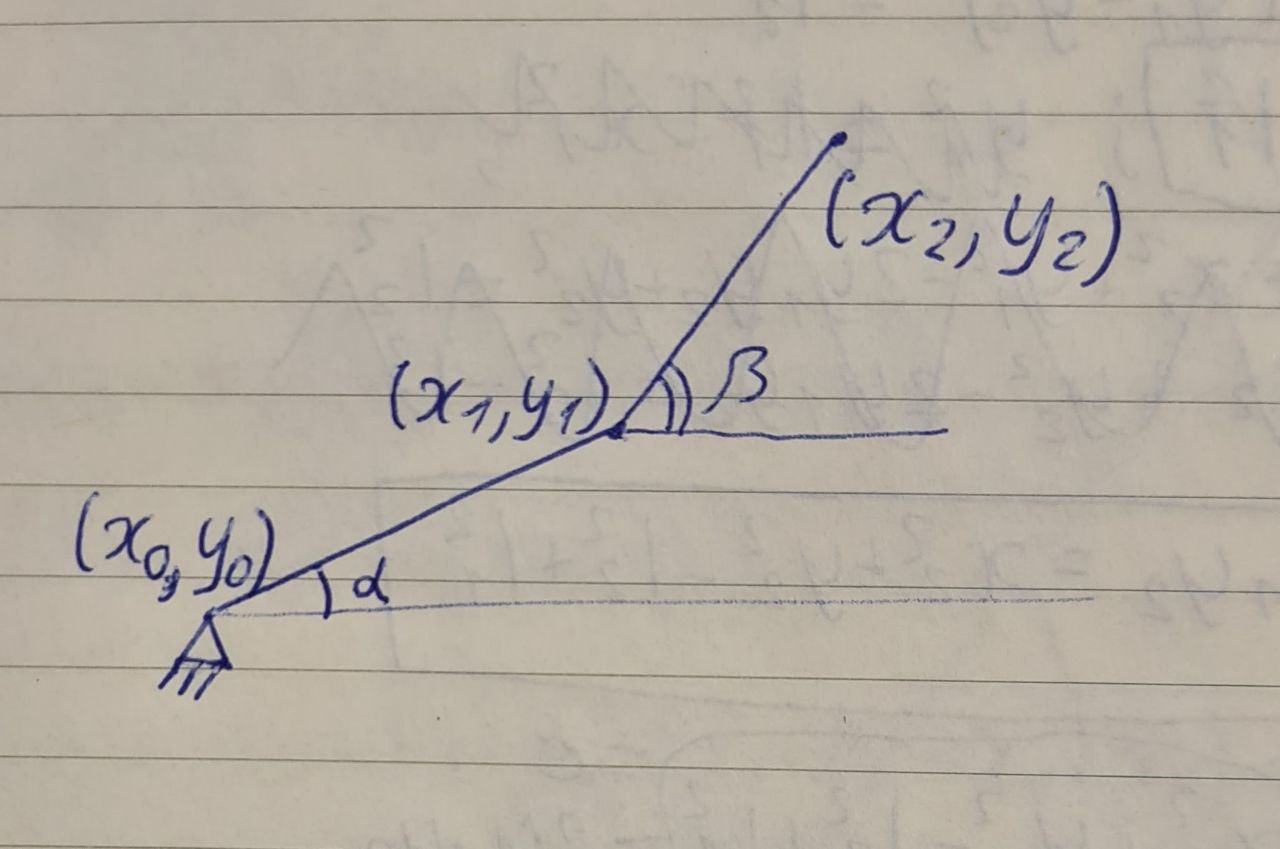

$(x_1 - x_2)^2 + (y_1 - y_2)^2 = l_2^2$

$x_1^2 + y_1^2 = l_1^2$

$x_1^2 - 2 x_1 x_2 + x_2^2 + y_1^2 - 2 y_1 y_2 + y_2^2 = l_2$

$2 x_1 x_2 + 2 y_1 y_2 = \underbrace{x_2^2 + y_2^2 - l_2^2 + l_1^2}_{=C}$

$x_1 = \frac{C - 2 y_1 y_2}{2 x_2}$

$\frac{C^2 - 4 C y_1 y_2 + 4 y_1^2 y_2^2}{4 x_2^2} + y_1^2 = l_1^2$

$(1 + \frac{y_2^2}{x_2^2}) y_1^2 - \frac{C y_2}{x_2^2} y_1 + \frac{C^2}{4 x_2^2} - l_1^2 = 0$

In [23]:
import cv2
import numpy as np
import time
import math

from IPython.display import display, clear_output
from matplotlib import pyplot as plt

WIND_X = 500
WIND_Y = 400

#шаг угла
ang_step = 0.1

#положение "крепления"
base_x = WIND_X // 2
base_y = WIND_Y // 2

#длины звеньев
l1 = 70
l2 = 50

#углы звеньев относительно предыдущего (или горизонтали)
alpha = 1
beta = 2

#целевая точка
xref = base_x + 15
yref = base_x + 35

#canvas = np.ones ((WIND_Y, WIND_X, 3), np.uint8) * 50

#вычисление координат конца кинематической цепи
def calc_endpoint_position (base_x, base_y, l1, l2, alpha, beta):
    x1 = base_x + l1 * math.cos (alpha)
    y1 = base_y + l1 * math.sin (alpha)
    
    x2 = x1 + l2 * math.cos (alpha + beta)
    y2 = y1 + l2 * math.sin (alpha + beta)
    
    return x1, y1, x2, y2

#рисование состояния
def draw_state (base_x, base_y, x1, y1, x2, y2, xref, yref, l1, l2, distance):
    canvas = np.ones ((WIND_Y, WIND_X, 3), np.uint8) * 50
    
    cv2.line (canvas, (base_x, base_y), (int (x1), int (y1)), (200, 179, 50), 2)
    cv2.line (canvas, (int (x2), int (y2)), (int (x1), int (y1)), (200, 179, 50), 2)
    
    cv2.circle (canvas, (xref, yref), 5, (100, 130, 240), 3)

    cv2.circle (canvas, (base_x, base_y), l1, (100, 130, 240))
    cv2.circle (canvas, (base_x, base_y), l1 + l2, (100, 130, 240))

    font = cv2.FONT_HERSHEY_SIMPLEX 
    org = (50, 50)
    fontScale = 1
    color = (255, 0, 0)
    thickness = 2
    cv2.putText (canvas, 'distance: ' + str (distance) [: 6], org, font,  
                       fontScale, color, thickness, cv2.LINE_AA)
    
    return canvas

def show_canvas (canvas):
    plt.figure(figsize=(20,10))
    plt.imshow (canvas)
    plt.show ()
    plt.pause (0.01)
    clear_output(wait = True)

In [24]:
while (True):
    #нахождение координат конца
    x1, y1, x2, y2 = calc_endpoint_position (base_x, base_y, l1, l2, alpha, beta)
    
    #изменение углов
    alpha += ang_step
    beta  -= ang_step * 1.3
    
    #нахождение расстояния от конца до целевой точки
    distance = math.sqrt ((xref - x2)**2 + (yref - y2)**2)
    
    #визуализация
    canvas = draw_state (base_x, base_y, x1, y1, x2, y2, xref, yref, l1, l2, distance)
    
    show_canvas (canvas)

KeyboardInterrupt: 

15876 iterations
116 solution improvements


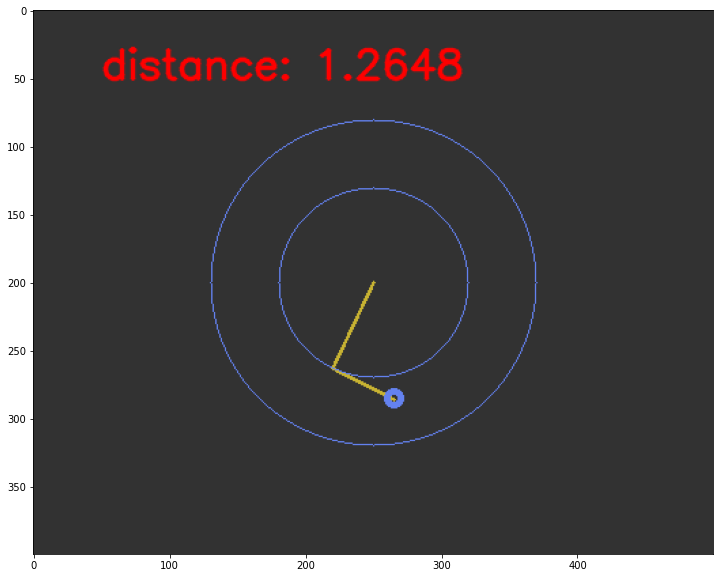

In [35]:
max_angle = 6.3
ang_step = 0.05

min_distance = 1000000
alpha_optimal = 0
beta_optimal = 0

iter_num = 0
optim_num = 0

for i in range (int (max_angle / ang_step) + 1):
    for j in range (int (max_angle / ang_step) + 1):
        #нахождение координат конца
        x1, y1, x2, y2 = calc_endpoint_position (base_x, base_y, l1, l2,
                            ang_step * i, ang_step * j)

        #нахождение расстояния от конца до целевой точки
        distance = math.sqrt ((xref - x2)**2 + (yref - y2)**2)

        iter_num += 1

        if (distance < min_distance):
            alpha_optimal = ang_step * i
            beta_optimal = ang_step * j
            min_distance = distance

            optim_num += 1

x1, y1, x2, y2 = calc_endpoint_position (base_x, base_y, l1, l2, alpha_optimal, beta_optimal)

#визуализация найденных значений
canvas = draw_state (base_x, base_y, x1, y1, x2, y2, xref, yref, l1, l2, min_distance)

print (str (iter_num) + " iterations")
print (str (optim_num) + " solution improvements")

show_canvas (canvas)